# Training

In [1]:
%matplotlib inline
from utils import *

Using TensorFlow backend.


In [2]:
#Load Dataset
X_train0, y_train = prepare_dataset(data_dir, 'train')
X_test0, y_test = prepare_dataset(data_dir, 'test')
t = int(time.time())

Loading numpy
Loading numpy


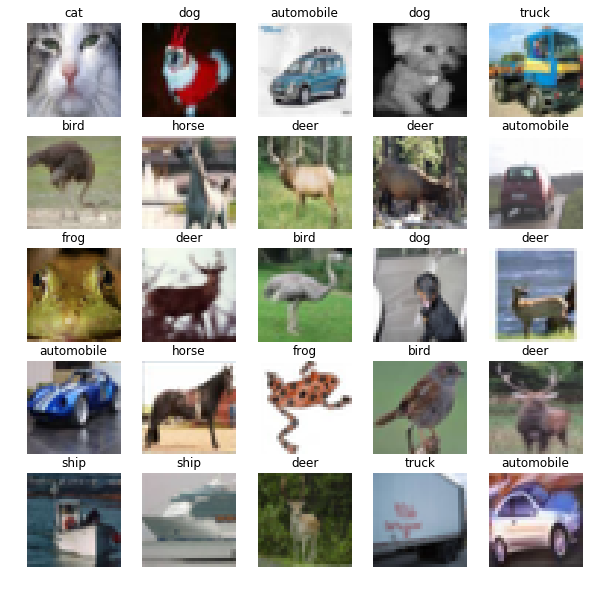

In [3]:
#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(50000))
        axes1[j][k].set_axis_off()
        axes1[j][k].set_title(inv_class_dict[y_train[i]])
        axes1[j][k].imshow(X_train0[i], interpolation='nearest')

In [4]:
#Normalizing
mean = np.mean(X_train0,axis=(0,1,2,3))
std = np.std(X_train0,axis=(0,1,2,3))
np.save('mean',mean)
np.save('std',std)
X_train = z_normalization(X_train0, mean, std)
X_test = z_normalization(X_test0, mean, std)

In [5]:
#Labels to binary
y_train_binary = keras.utils.to_categorical(y_train,num_classes)
y_test_binary = keras.utils.to_categorical(y_test,num_classes)

In [6]:
#CNN Model
model = create_CNN_model(X_train.shape[1:], num_classes, 0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
Bn_1 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
Bn_2 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
Max_pool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
Drop_1 (Dropout)             (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 16, 16, 64)        18496     
__________

In [7]:
#Training Model
model, H = train_CNN_model(model, X_train, y_train_binary, X_test, y_test_binary, model_dir, t, batch_size=256, epochs=100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 328us/step - loss: 1.6701 - acc: 0.4090 - val_loss: 1.3269 - val_acc: 0.5172

Epoch 00001: val_acc improved from -inf to 0.51720, saving model to Models\best_Cifar10_CNN_1548647360
Epoch 2/100
50000/50000 [==============================] - 13s 263us/step - loss: 1.2071 - acc: 0.5701 - val_loss: 1.0844 - val_acc: 0.6122

Epoch 00002: val_acc improved from 0.51720 to 0.61220, saving model to Models\best_Cifar10_CNN_1548647360
Epoch 3/100
50000/50000 [==============================] - 13s 262us/step - loss: 1.0078 - acc: 0.6461 - val_loss: 0.9174 - val_acc: 0.6806

Epoch 00003: val_acc improved from 0.61220 to 0.68060, saving model to Models\best_Cifar10_CNN_1548647360
Epoch 4/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.8733 - acc: 0.6958 - val_loss: 0.7463 - val_acc: 0.7367

Epoch 00004: val_acc improved from 0.68060 to 0.73670, saving model to 

50000/50000 [==============================] - 13s 266us/step - loss: 0.2385 - acc: 0.9178 - val_loss: 0.4967 - val_acc: 0.8546

Epoch 00037: val_acc did not improve from 0.86290
Epoch 38/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.2380 - acc: 0.9171 - val_loss: 0.4879 - val_acc: 0.8553

Epoch 00038: val_acc did not improve from 0.86290
Epoch 39/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.2295 - acc: 0.9206 - val_loss: 0.4970 - val_acc: 0.8580

Epoch 00039: val_acc did not improve from 0.86290
Epoch 40/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.2213 - acc: 0.9233 - val_loss: 0.5104 - val_acc: 0.8538

Epoch 00040: val_acc did not improve from 0.86290
Epoch 41/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.2169 - acc: 0.9250 - val_loss: 0.5161 - val_acc: 0.8514

Epoch 00041: val_acc did not improve from 0.86290
Epoch 42/100
50000/50000 [===========================

50000/50000 [==============================] - 13s 265us/step - loss: 0.1412 - acc: 0.9513 - val_loss: 0.5345 - val_acc: 0.8643

Epoch 00079: val_acc did not improve from 0.86710
Epoch 80/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.1368 - acc: 0.9527 - val_loss: 0.5560 - val_acc: 0.8616

Epoch 00080: val_acc did not improve from 0.86710
Epoch 81/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.1355 - acc: 0.9523 - val_loss: 0.5598 - val_acc: 0.8612

Epoch 00081: val_acc did not improve from 0.86710
Epoch 82/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.1412 - acc: 0.9507 - val_loss: 0.5521 - val_acc: 0.8598

Epoch 00082: val_acc did not improve from 0.86710
Epoch 83/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.1355 - acc: 0.9533 - val_loss: 0.5343 - val_acc: 0.8650

Epoch 00083: val_acc did not improve from 0.86710
Epoch 84/100
50000/50000 [===========================

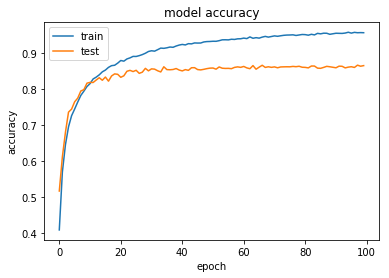

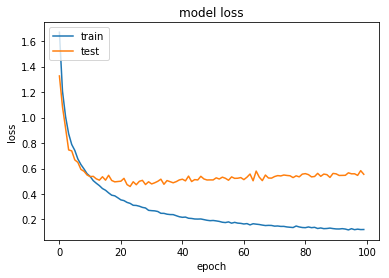

In [23]:
# summarize history for accuracy and loss
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Testing

In [8]:
#Load Dataset
X_test0, y_test = prepare_dataset(data_dir, 'test')
y_test_binary = keras.utils.to_categorical(y_test,num_classes)

Loading numpy


In [9]:
#Normalize Dataset
mean = np.load('mean.npy')
std = np.load('std.npy')

X_test = z_normalization(X_test0, mean, std)

In [10]:
#Load Trained Model
model = load_model(model_dir +'\\best_Cifar10_CNN')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
Bn_1 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
Bn_2 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
Max_pool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
Drop_1 (Dropout)             (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 16, 16, 64)        18496     
__________

Accuracy : 0.8708
F1-score : 0.870340023600121
Normalized confusion matrix
[[0.892 0.009 0.025 0.011 0.006 0.001 0.005 0.002 0.032 0.017]
 [0.007 0.927 0.002 0.001 0.001 0.001 0.002 0.    0.013 0.046]
 [0.036 0.    0.8   0.034 0.048 0.02  0.039 0.015 0.006 0.002]
 [0.019 0.002 0.04  0.736 0.042 0.085 0.045 0.015 0.007 0.009]
 [0.009 0.    0.024 0.033 0.867 0.011 0.018 0.037 0.001 0.   ]
 [0.008 0.002 0.014 0.121 0.026 0.788 0.011 0.025 0.001 0.004]
 [0.006 0.001 0.017 0.029 0.016 0.008 0.916 0.004 0.001 0.002]
 [0.008 0.    0.012 0.021 0.02  0.013 0.003 0.918 0.001 0.004]
 [0.033 0.007 0.003 0.004 0.002 0.001 0.005 0.002 0.932 0.011]
 [0.014 0.03  0.002 0.005 0.    0.001 0.    0.004 0.012 0.932]]


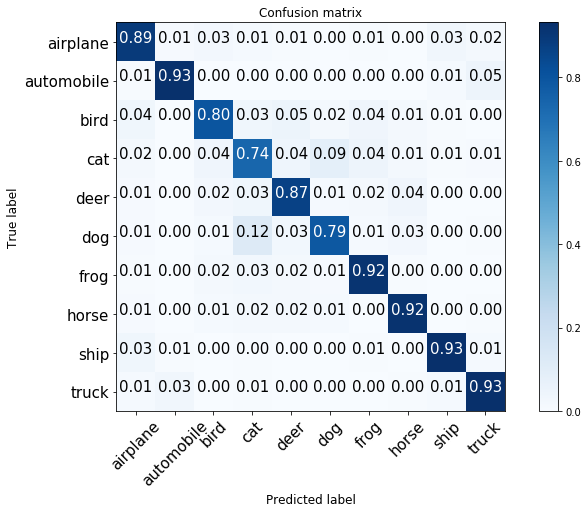

In [21]:
cf_matrix, accuracy, macro_f1, mismatch, y_pred = calculate_metrics(model, X_test, y_test_binary)
print('Accuracy : {}'.format(accuracy))
print('F1-score : {}'.format(macro_f1))

plot_confusion_matrix(cf_matrix, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

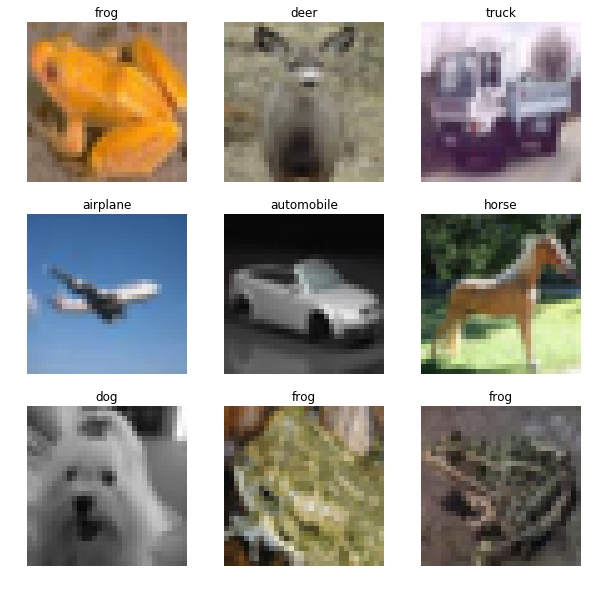

In [20]:
#Visualizing Predictions
fig, axes1 = plt.subplots(3,3,figsize=(10,10))
for j in range(3):
    for k in range(3):
        i = np.random.choice(10000)
        axes1[j][k].set_axis_off()
        axes1[j][k].set_title(inv_class_dict[y_pred[i]])
        axes1[j][k].imshow(X_test0[i], interpolation='nearest')

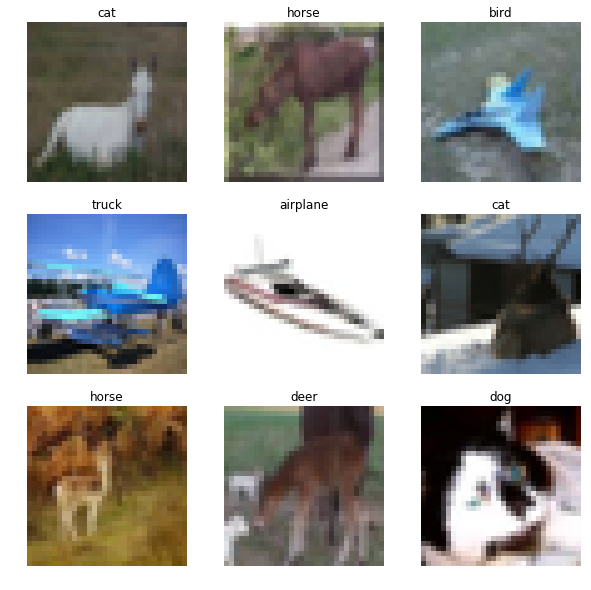

In [14]:
#Visualizing only wrong predictions
fig, axes1 = plt.subplots(3,3,figsize=(10,10))
for j in range(3):
    for k in range(3):
        i = np.random.choice(len(mismatch[0]))
        ind = mismatch[0][i]
        axes1[j][k].set_axis_off()
        axes1[j][k].set_title(inv_class_dict[y_pred[ind]])
        axes1[j][k].imshow(X_test0[ind], interpolation='nearest')